In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
%matplotlib inline
sns.set()

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/000931504/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/000931504/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/000931504/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/000931504/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/000931504/StoreStaff.csv', index_col=0)



In [19]:
small = []
medium =[]
large = []
explodeList = []
categories = ['Large', 'Medium', 'small']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_sales = data[name].sum()
    if total_sales > 300000:
        category = 0
        large.append(name)
        explodeList.append(0)
    elif total_sales > 100000:
        category = 1
        medium.append(name)
        explodeList.append(1)
    else:
        category = 2
        small.append(name)
        explodeList.append(2)

    categories_selected[category].append(name)
    
for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))
print(small)



Large: ['RAH', 'SGA', 'QSN', 'SMM']
Medium: ['RGS', 'PGL', 'MUY', 'OSG', 'QMD', 'OMV', 'PAA', 'NAQ']
small: ['CNQ', 'UMU', 'ENY', 'DZT', 'DTJ', 'UGJ', 'WMB', 'YGY', 'TSE', 'XSV', 'ZSD', 'AEI', 'ATT', 'TAP', 'WYG', 'VSM', 'NGB', 'ZMS', 'NMO', 'BZM', 'CFG', 'XML', 'MAJ', 'YYO', 'EFN', 'WGR', 'BTB', 'VYZ']
['CNQ', 'UMU', 'ENY', 'DZT', 'DTJ', 'UGJ', 'WMB', 'YGY', 'TSE', 'XSV', 'ZSD', 'AEI', 'ATT', 'TAP', 'WYG', 'VSM', 'NGB', 'ZMS', 'NMO', 'BZM', 'CFG', 'XML', 'MAJ', 'YYO', 'EFN', 'WGR', 'BTB', 'VYZ']


The code above divides the data for daily stroe customers like identifed the first notebook as medium, large and small

In [20]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
print(summary_data.head())



     StoreMarketing  StoreOverheads  totalStoreCustomers  StoreSize  \
RGS           17000           25000               167941       1273   
CNQ            3000           19000                23261        427   
UMU            3000           27000                26437        167   
ENY            4000           94000                31017        501   
PGL           15000           34000               135221       2394   

     StoreStaff  
RGS          12  
CNQ           6  
UMU           3  
ENY           8  
PGL          24  


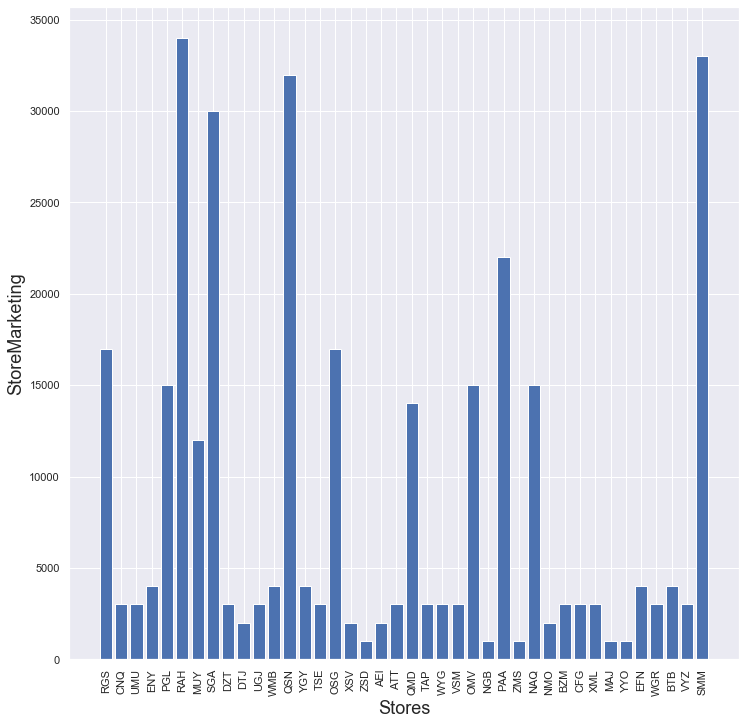

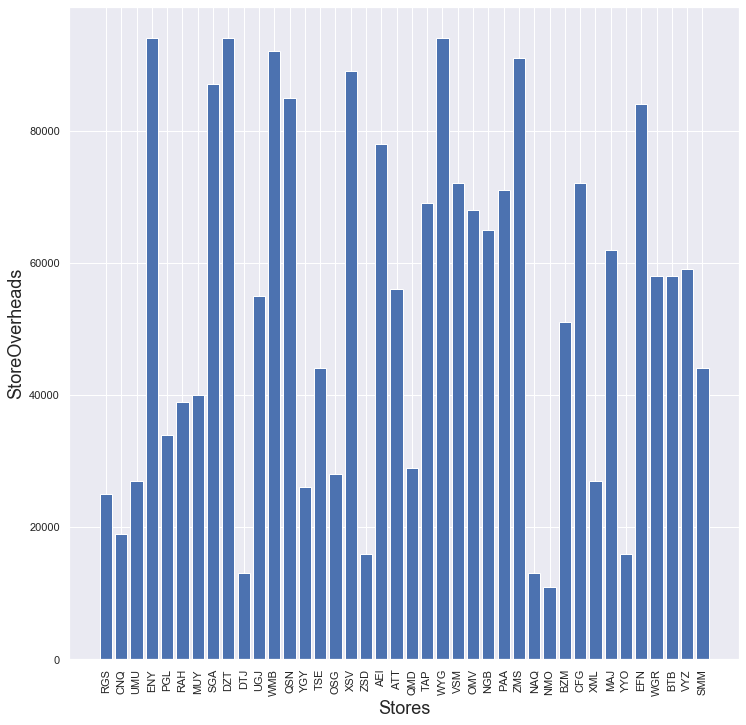

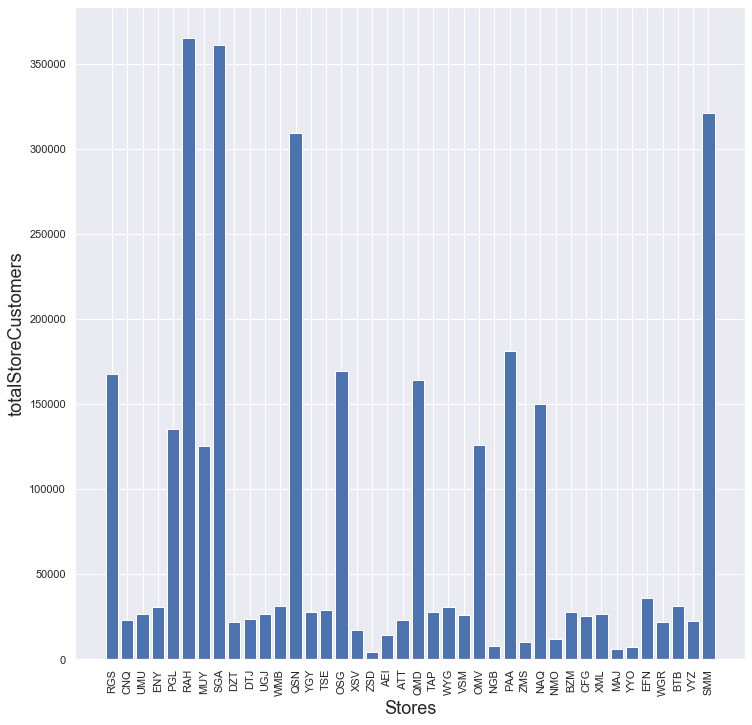

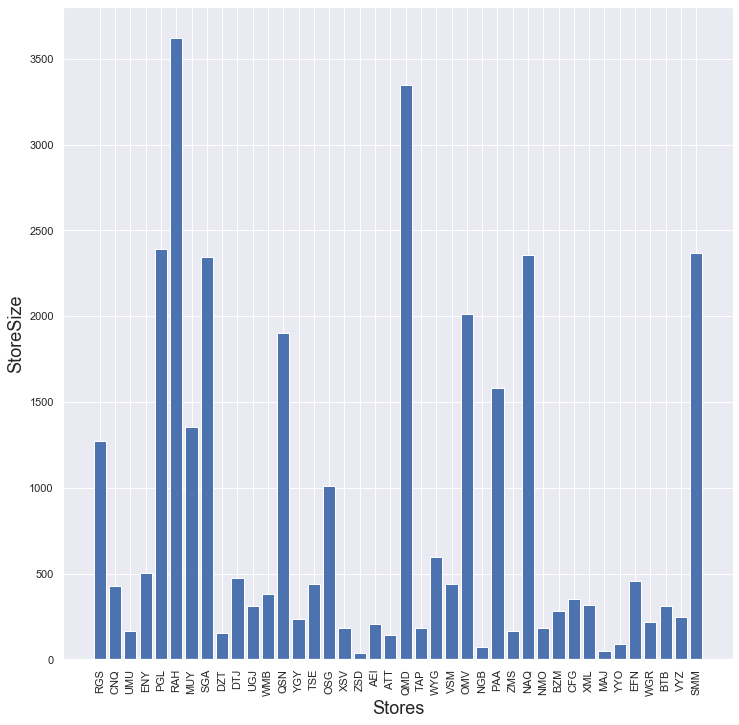

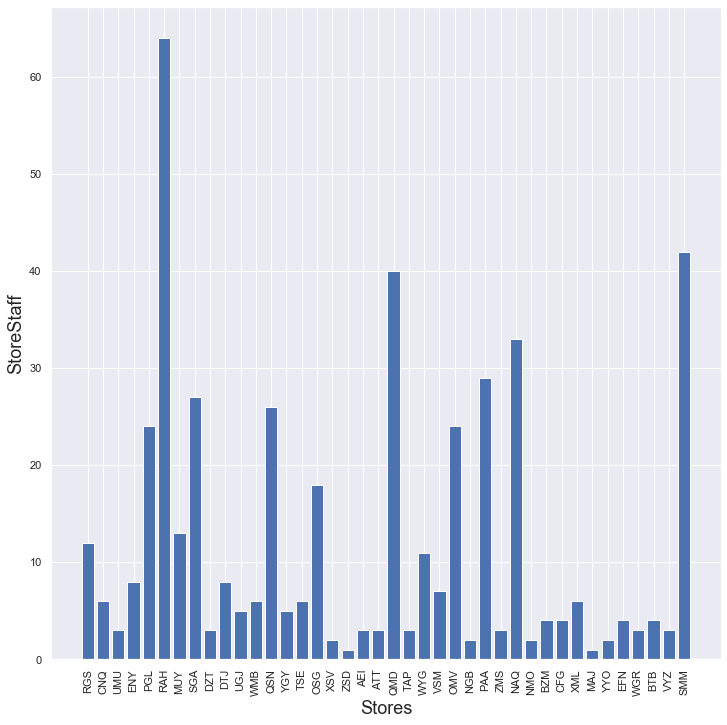

In [21]:
for attribute in summary_data:
    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(summary_data.index))
    plt.bar(x_pos, summary_data[attribute], align='center')
    plt.xticks(x_pos, summary_data.index,rotation=90)
    plt.xlabel('Stores', fontsize=18)
    plt.ylabel(attribute, fontsize=18)
    plt.show()



The bar chat above helped to visualize all the summary documents against the daily customers. The bar chat x-axis is daily customers and ther rest each represent indivual column

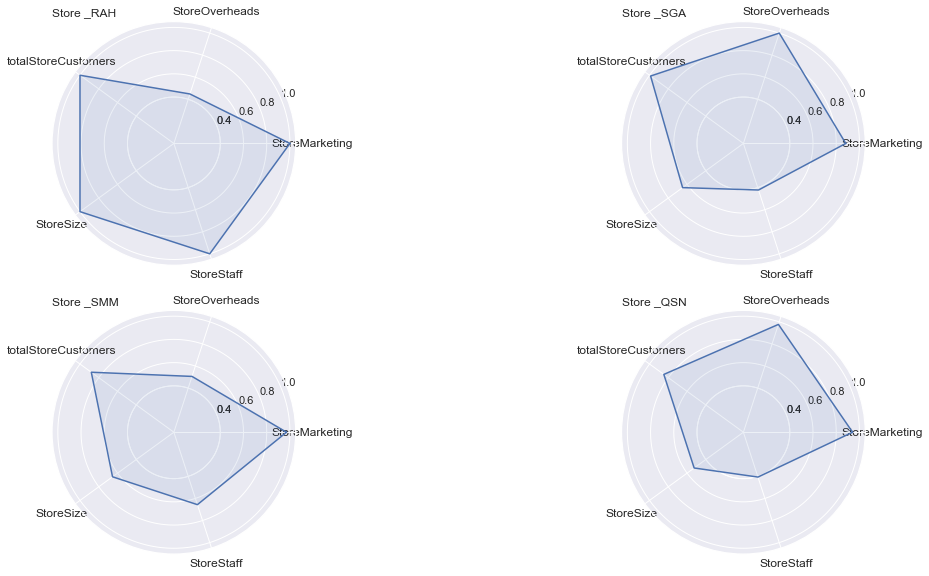

In [22]:
selected = ['RAH', 'SGA','SMM','QSN']
normalised_data = summary_data / summary_data.loc[selected].max()
n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(16, 16))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(4, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.4, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles)
    sub.set_xticklabels(normalised_data.columns, fontsize=12)
    sub.set_title('Store _' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

Radar charts are a way to visualize multivariate data. They are used to plot one or more groups of values over multiple common variables. They do this by giving an axis for each variable, and these axes are arranged radially around a central point and spaced equally. The data from a single observation are plotted along each axis and connected to form a polygon. Multiple observations can be placed in a single chart by displaying multiple polygons, overlaying them and reducing the opacity of each polygon.

The radar plot is a great way to visualaize more than one variable at once. In our case we read daily customers that contain 40 stores, marketing, storestaff, store overheads and store size.  

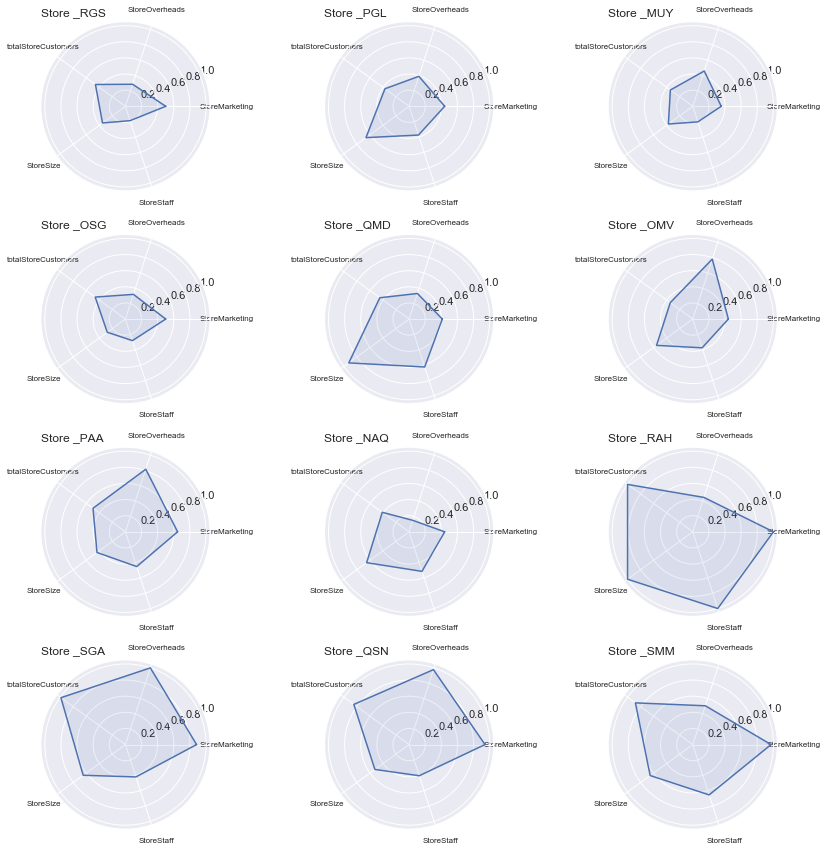

In [23]:
selected = medium + large
normalised_data = summary_data / summary_data.loc[selected].max()



n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(12, 12))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(4, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles)
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Store _' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

The radar plot used above to visualize all the variable togther for medium and large stores.

['CNQ', 'UMU', 'ENY', 'DZT', 'DTJ', 'UGJ', 'WMB', 'YGY', 'TSE', 'XSV', 'ZSD', 'AEI', 'ATT', 'TAP', 'WYG', 'VSM', 'NGB', 'ZMS', 'NMO', 'BZM', 'CFG', 'XML', 'MAJ', 'YYO', 'EFN', 'WGR', 'BTB', 'VYZ']


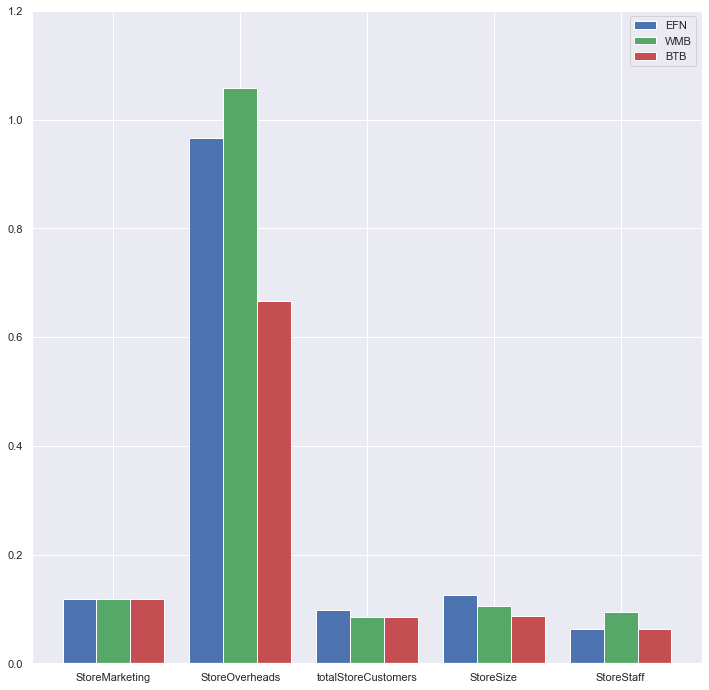

In [24]:
selected = ['EFN', 'WMB','BTB']
print(small)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(12, 12))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Store_ ' + name)
    c += 1
plt.yticks([0,0.2, 0.4,0.6,0.8,1,1.2])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend(selected)
plt.show()


This bar display a diffrent visualization by comparing the summary variable all togther for specific stores. The bar showing above display the highest smallest stores depends to the customers visited.

     StoreMarketing  StoreOverheads  totalStoreCustomers  StoreSize  \
RGS           17000           25000               167941       1273   
CNQ            3000           19000                23261        427   
UMU            3000           27000                26437        167   
ENY            4000           94000                31017        501   
PGL           15000           34000               135221       2394   

     StoreStaff  
RGS          12  
CNQ           6  
UMU           3  
ENY           8  
PGL          24  
       StoreMarketing  StoreOverheads  totalStoreCustomers    StoreSize  \
count       40.000000       40.000000            40.000000    40.000000   
mean      8275.000000    53875.000000         79934.450000   829.325000   
std       9784.832585    27130.442264        102860.989272   967.345493   
min       1000.000000    11000.000000          4092.000000    36.000000   
25%       3000.000000    27750.000000         22625.500000   182.750000   
50%       3000.

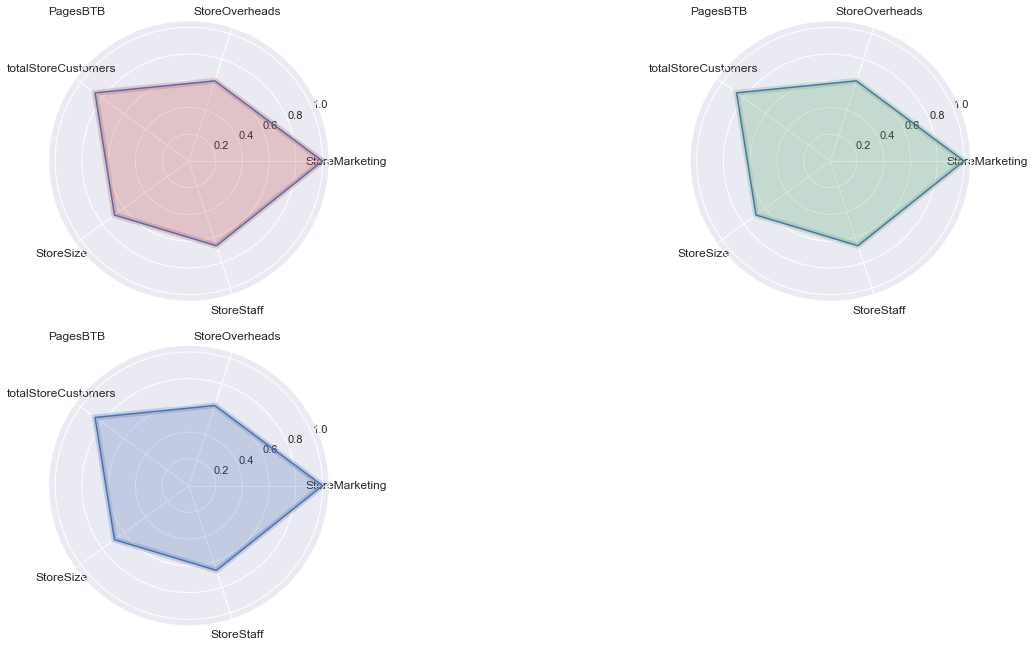

In [25]:
from matplotlib.colors import ListedColormap
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values

pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)
print(summary_data.head())
print(summary_data.describe())
selected = ['EFN', 'WMB','BTB']
normalised_data = summary_data / summary_data.loc[selected ].max()



n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(18, 18))
counter = 1

for name in selected:
    my_colors = ['r', 'g', 'b']  # red, green, blue, black, etc.

    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
for color in  my_colors:
    sub = plt.subplot(4, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.25,color=color,linewidth=6)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles)
    sub.set_xticklabels(normalised_data.columns, fontsize=12)
    sub.set_title('Pages' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()


The radar chart showing visualization for the smallest customers comparing each on its variables such as marketing, store size etc

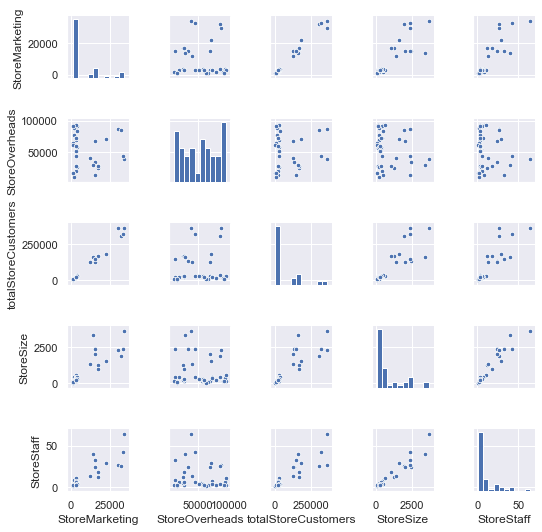

In [26]:

sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()


The sublot scatter chart with histogram included used to show correlation relationships between the variables 

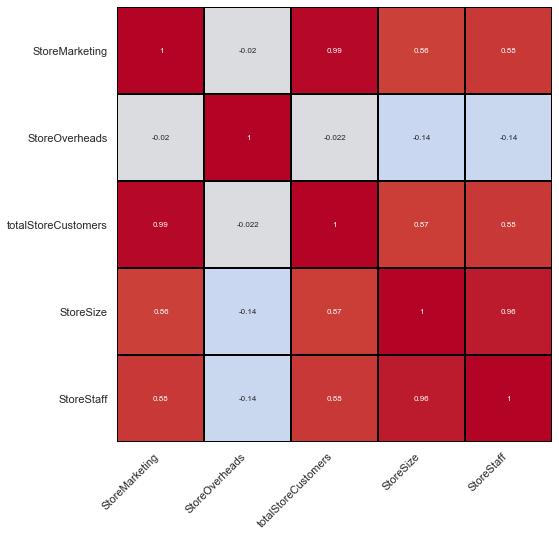

In [27]:
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values
summary_data_large = summary_data.loc[medium + large + small]


plt.figure(figsize=(8, 8))
corr = summary_data_large.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True,
                 annot_kws={"size": 8}, cmap= 'coolwarm',linewidths=1, linecolor='black',cbar=False)
ax.set_ylim(5.0, 0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


The heatmap above used to clarify  the greatest correlation relationship between variable using decimals which shows it quite clear to identify for example compare store staff with store size giving 0.94. I beleive anything above 70 is great correlation 

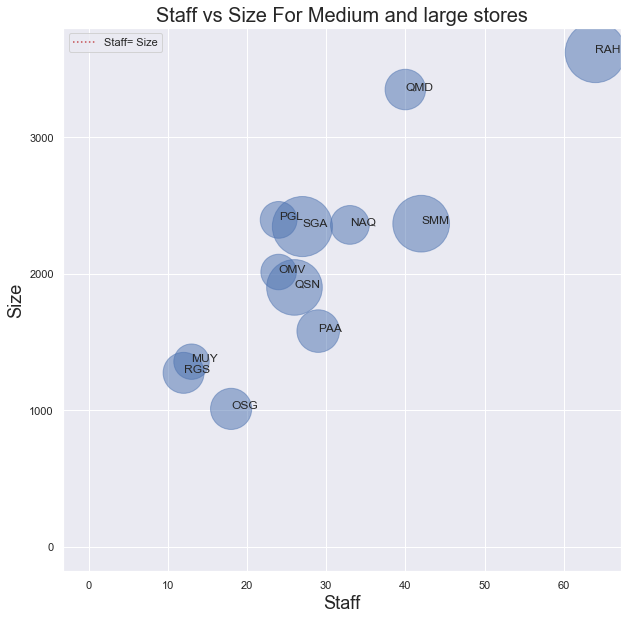

In [28]:
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)




summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values


summary_data_small = summary_data.loc[large + medium ]

summary_data_small['BubbleSize'] = summary_data_small['totalCustomers'] * 0.010


plt.figure(figsize=(10, 10))
plt.scatter(summary_data_small['StoreStaff'], summary_data_small['StoreSize'],s=summary_data_small['BubbleSize'], alpha=0.5)
plt.yticks([0, 1000, 2000, 3000, 4000])
plt.xticks([0, 10, 20, 30, 40,50,60,70])
plt.title('Staff vs Size For Medium and large stores', fontsize=20)
plt.xlabel('Staff', fontsize=18)
plt.ylabel('Size', fontsize=18)
for i, name in enumerate(summary_data_small.index):
    plt.annotate(name, (summary_data_small['StoreStaff'][i],summary_data_small['StoreSize'][i]))
plt.plot([0, 0], [0, 0], linestyle=':', color='r', label='Staff= Size')
plt.legend(loc=2)
plt.show()

The scatter plot with bubble feature helps to visualise more variable as you can see I compare staff and size using Y asix and staff axis but the buble size determine the total customers shops. The visualization helped me to understand that the total customers not entirly determined by the store size of staff 

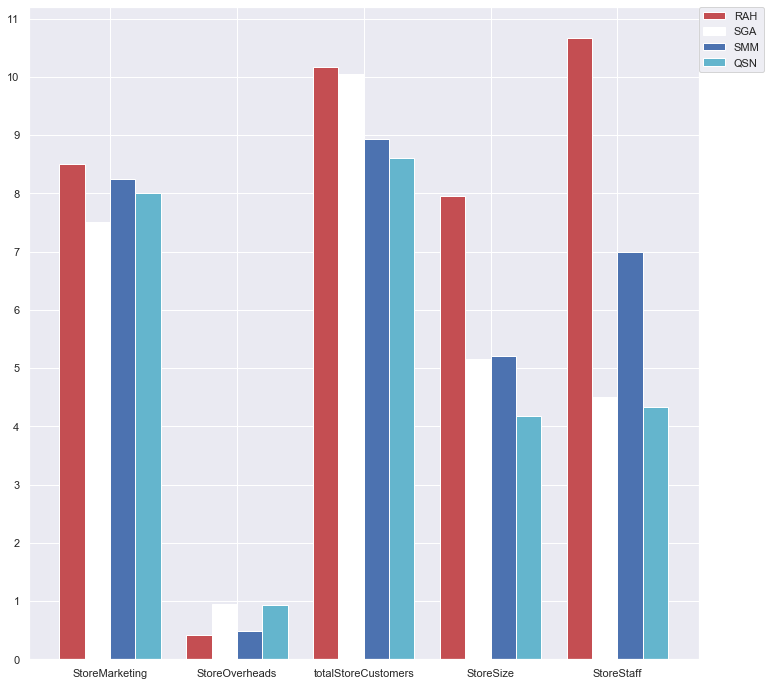

In [29]:
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values
selected = ['RAH', 'SGA','SMM','QSN']  # high volume
colours = ['r', 'w', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(12, 12))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
        width=bar_width, edgecolor='white', label='Store_ ' + name)
    c += 1
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend(selected,bbox_to_anchor=(1.00,1), loc=2, borderaxespad=0.)
plt.show()

The visualiaztion above display a bar chart which describes the highest stores with highest and their related variables. Bar chart help to visualize multiple variables togther like radar chart. However with bar chart gives you comparison of similar vairables togther for each store

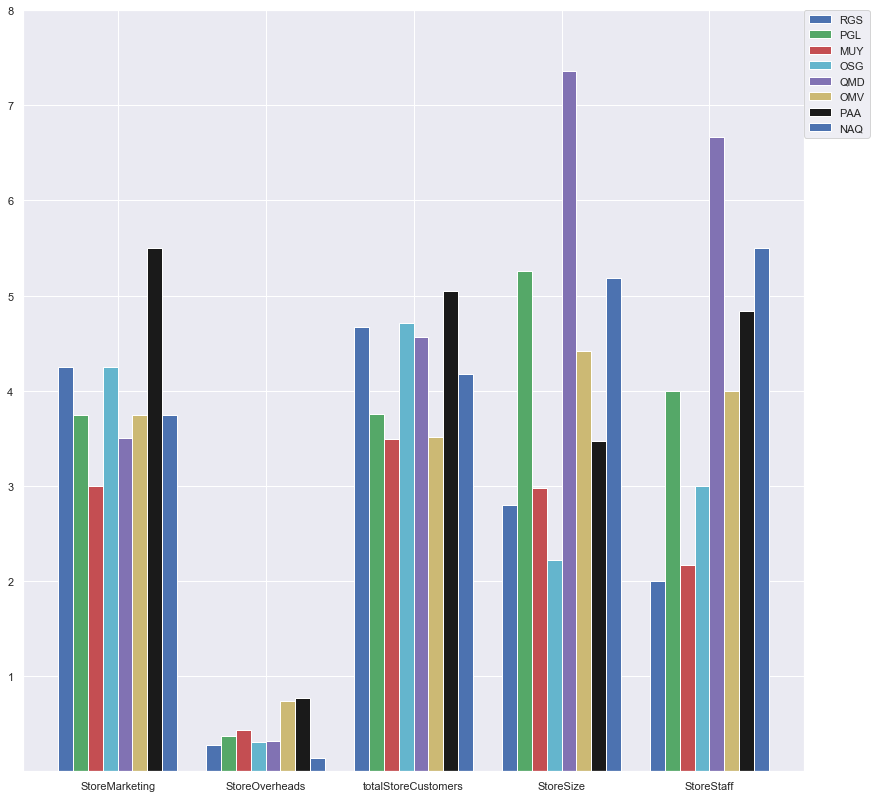

In [30]:
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values


colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
selected = medium 
plt.figure(figsize=(14, 14))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
        width=bar_width, edgecolor='white', label='Store_ ' + name)
    c += 1
plt.yticks([1,2,3,4,5,6,7,8])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend(selected,bbox_to_anchor=(1.00,1), loc=2, borderaxespad=0.)
plt.show()

The bar chart above representing the medium stores by comparing indvidual togther like seen above.You can describe each store variable with other stores to understand for example why you have such customers.

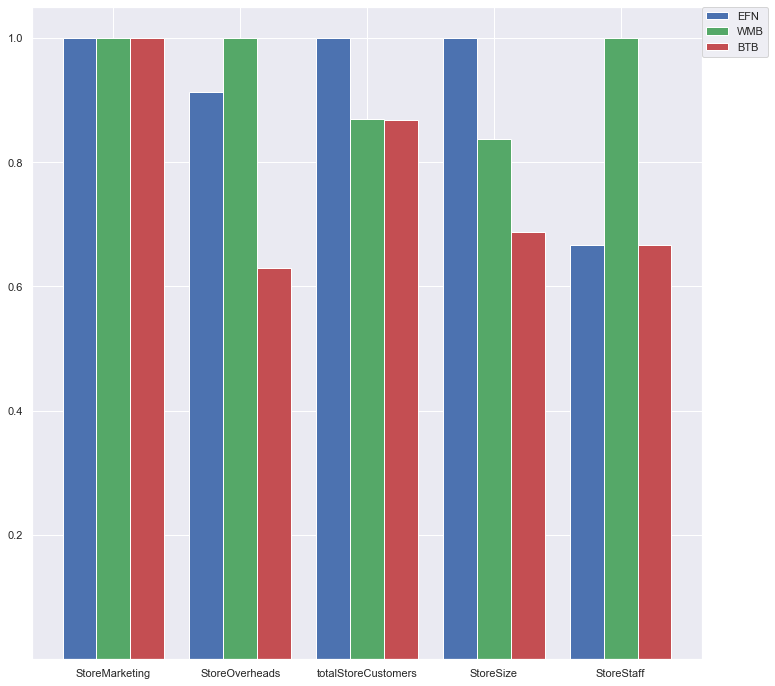

In [31]:
data = pd.read_csv('../CW_DATA/DailyCustomers.csv', index_col=0)
StoreMarketing = pd.read_csv('../CW_DATA/StoreMarketing.csv', index_col=0)
StoreOverheads = pd.read_csv('../CW_DATA/StoreOverheads.csv', index_col=0)
StoreSize =pd.read_csv('../CW_DATA/StoreSize.csv', index_col=0)
StoreStaff =pd.read_csv('../CW_DATA/StoreStaff.csv', index_col=0)
summary_data = pd.DataFrame(index=data.columns)
summary_data['StoreMarketing'] = StoreMarketing.values
summary_data['StoreOverheads'] = StoreOverheads.values
summary_data['totalStoreCustomers'] = data.sum().values
summary_data['StoreSize'] = StoreSize.values
summary_data['StoreStaff'] = StoreStaff.values
selected = ['EFN', 'WMB','BTB']
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(12, 12))
c = 0
n_bars = len(selected)
x_pos_base = np.arange(len(summary_data.columns))
bar_width = 0.8 / n_bars
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
        width=bar_width, edgecolor='white', label='Store_ ' + name)
    c += 1
plt.yticks([0.20,0.40,0.60,0.80,1])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, summary_data.columns)
plt.legend(selected,bbox_to_anchor=(1.00,1), loc=2, borderaxespad=0.)
plt.show()

The bar chart above representing the small stores by comparing indvidual togther like seen above.You can describe each store variable with other stores to understand for example why you have such customers.